<a href="https://colab.research.google.com/github/QuantumQist/Toy-Problems/blob/main/Polynomial_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial fitting

We describe simple methods of polynomial fitting. Our curve has the shape
$$ y(x) = 4 x^2 - x^4 + \alpha \mathcal{N}(0,1), $$
where $\mathcal{N}(0,1)$ is drawn from a Gaussian of mean $0$ and standard deviation $1$. $\alpha$ is a scale factor and we will keep it small in this notebook.

Our goal is to recover the original curve without the noise.

We will use two methods for fitting
1. `scikit`'s `PolynomialFeatures` with degree 4 fit. It fits the curve to the following polynomial
$$ c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x_4.$$
Observe that it includes the redundant coefficients $c_0$, $c_1$ and $c_3$.
2. We will assume we know that only second and fourth order term survive. We will build a regression model based on that knowledge.





In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import numpy as np
import matplotlib.pyplot as plt

# 1. Generate data

We will work on a grid of 50 datapoints in range from 0 to 2

In [275]:
# Set model parameters
ALPHA = 2.

# Generate arguments
X = np.linspace(start = 0, stop = 2, num = 200)

# Generate y(x) without noise
y_without_noise = 4*X**2 - X**4

# Generate noise
noise = np.random.normal(size = len(X))

# Add noise to get y(x)
y = y_without_noise + ALPHA * noise

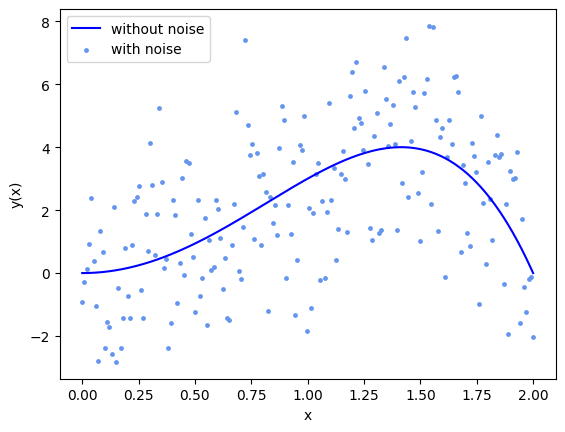

In [286]:
plt.plot(X, y_without_noise, label = "without noise", color = "blue")
plt.scatter(X, y, s = 6, label = "with noise", color = "cornflowerblue")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend();

## 2. Fit with `PolynomialFeatures`

Next two cells base on
https://www.statology.org/sklearn-polynomial-regression/

We will fit the blue points with a polynomial of degree 4.

In [277]:
FIT_DEGREE = 4

poly = PolynomialFeatures(degree=FIT_DEGREE, include_bias=False)

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(X.reshape(-1, 1))

#fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

#display model coefficients
poly_reg_model.coef_

array([  8.40714093, -15.47694379,  15.38966674,  -4.86891767])

In [278]:
#use model to make predictions on response variable
y_pred = poly_reg_model.predict(poly_features)

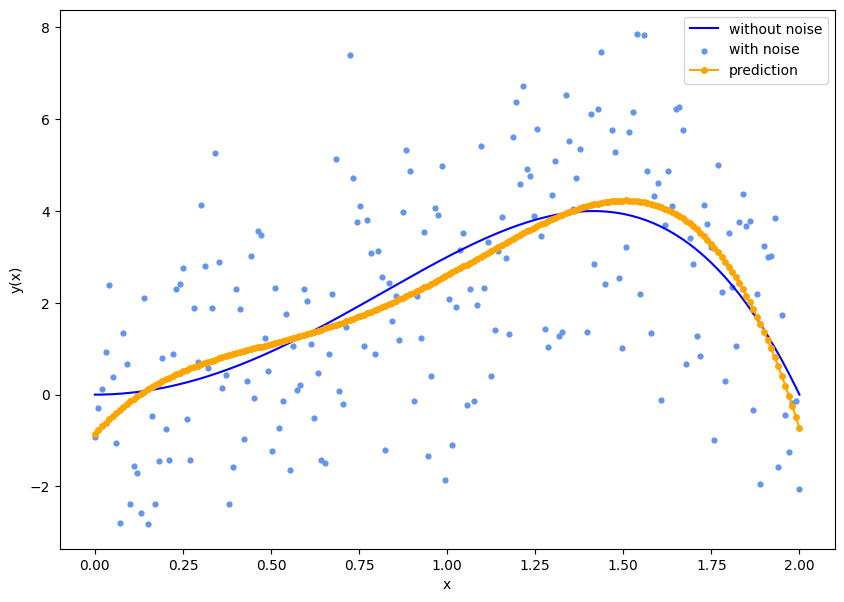

In [279]:
plt.figure(figsize = (10,7))
plt.plot(X, y_without_noise, label = "without noise", color = "blue")
plt.scatter(X, y, s = 12, label = "with noise", color = "cornflowerblue")
plt.plot(X, y_pred, '-o', label = "prediction", color = "orange", markersize = 4)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend();

## 3. Fit the curve given that we know the active polynomial coefficients.

Suppose that we know that the noiseless curve follows
$$y(x) = c_2 x^2 + c_4 x^4,$$
and we need to estimate $c_2$ and $c_4$.

To do so, we will first convert each value of x to an array
$$ \mathbf{X_{24}} = [x^2, x^4].$$

In [280]:
transformed_X = [[x_i**2, x_i**4] for x_i in X]

The line below finds the coefficients $c_2$ and $c_4$

In [281]:
#fit the second model
informed_model = LinearRegression()
informed_model.fit(transformed_X, y)

LinearRegression()

In [282]:
print(f"Estimated coefficients: c_2 = {informed_model.coef_[0]}, c_4 = {informed_model.coef_[1]}")

Estimated coefficients: c_2 = 4.06600396763522, c_4 = -1.0039493993858446


In [283]:
#use model to make predictions on response variable
y_informed_pred = informed_model.predict(transformed_X)

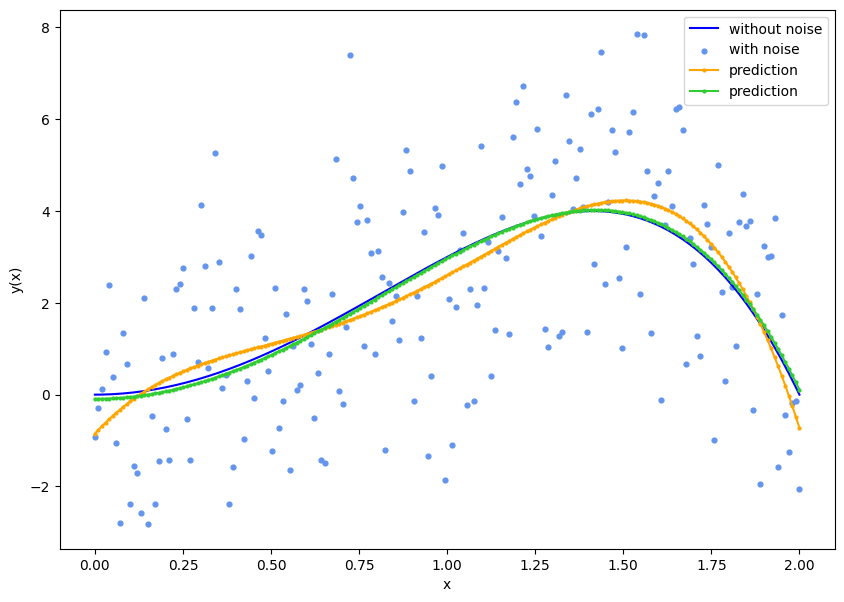

In [284]:
plt.figure(figsize = (10,7))
plt.plot(X, y_without_noise, label = "without noise", color = "blue")
plt.scatter(X, y, s = 12, label = "with noise", color = "cornflowerblue")
plt.plot(X, y_pred, '-o', label = "prediction", color = "orange", markersize = 2)
plt.plot(X, y_informed_pred, '-o', label = "prediction", color = "limegreen", markersize = 2)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend();